# Video Game Sales Dataset

Membros: Matheus Alexandre de Araujo, Symon Bezerra da Silva e Rodrigues Matheus Lima

Conjunto de dados original: Video Games Sales, por Ulrik Thyge Pedersen (https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales)

## Passo 1: Inicialização e Estabelecimento do Dashboard

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/matheusaraujotrd/Dashboard-Games-Sales/main/video_games_sales.csv", index_col="rank")

df.head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Gráficos -

## Passo 2: Limpeza de Dados (Data Cleansing)

O primeiro passo feito foi transformar a coluna year em efetivamente uma coluna de data no lugar de float.

In [4]:
df.year = pd.to_datetime(df.year, format='%Y')

In [5]:
df.head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
rank,,,,,,,,,,
1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Em seguida, verificou-se a existência de valores nulos:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          16598 non-null  object        
 1   platform      16598 non-null  object        
 2   year          16327 non-null  datetime64[ns]
 3   genre         16598 non-null  object        
 4   publisher     16540 non-null  object        
 5   na_sales      16598 non-null  float64       
 6   eu_sales      16598 non-null  float64       
 7   jp_sales      16598 non-null  float64       
 8   other_sales   16598 non-null  float64       
 9   global_sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 1.4+ MB


In [7]:
display((16598 - 16327), (16598 - 16540), round((len(df) * 0.05), 2))

271

58

829.9

Se desconsiderarmos o fato de algumas linhas terem as duas colunas com dados faltantes, então teremos no máximo 271 + 58 observações com dados faltantes, o que ainda é muito menor que o nosso limite de 5%, com 830 observações. Isso significa que, estatisticamente, não teremos grandes perdas em nossa amostragem ao removermos essas observações.

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          16291 non-null  object        
 1   platform      16291 non-null  object        
 2   year          16291 non-null  datetime64[ns]
 3   genre         16291 non-null  object        
 4   publisher     16291 non-null  object        
 5   na_sales      16291 non-null  float64       
 6   eu_sales      16291 non-null  float64       
 7   jp_sales      16291 non-null  float64       
 8   other_sales   16291 non-null  float64       
 9   global_sales  16291 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 1.4+ MB


In [10]:
16598 - 16291

307

Um total de 307 observações foram removidas. Considerando o tamanho do dataset, está dentro do limite permitido. O próximo passo é transformar as colunas de plataforma, gênero e editora em colunas categóricas:

In [11]:
type_obj = {"platform":"category", "genre":"category", "publisher":"category"}
for item in type_obj.keys():
    df[item] = df[item].astype(type_obj[item])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          16291 non-null  object        
 1   platform      16291 non-null  category      
 2   year          16291 non-null  datetime64[ns]
 3   genre         16291 non-null  category      
 4   publisher     16291 non-null  category      
 5   na_sales      16291 non-null  float64       
 6   eu_sales      16291 non-null  float64       
 7   jp_sales      16291 non-null  float64       
 8   other_sales   16291 non-null  float64       
 9   global_sales  16291 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(5), object(1)
memory usage: 1.1+ MB


Como desejamos fazer algumas análises mais específicas a respeito das plataformas e suas empresas, criei uma lista de todas as plataformas contidas no conjunto de dados para poder manipulá-las facilmente.

In [12]:
list(df.platform.unique())

['Wii',
 'NES',
 'GB',
 'DS',
 'X360',
 'PS3',
 'PS2',
 'SNES',
 'GBA',
 '3DS',
 'PS4',
 'N64',
 'PS',
 'XB',
 'PC',
 '2600',
 'PSP',
 'XOne',
 'GC',
 'WiiU',
 'GEN',
 'DC',
 'PSV',
 'SAT',
 'SCD',
 'WS',
 'NG',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

O código abaixo cria uma coluna adicional de "Handheld" em que o resultado é True quando o console em questão é portátil e False quando não é:

In [13]:
handheld = ["GB", "DS", "GBA", "3DS", "PSP", "PSV", "GG", "WS"]

df["handheld"] = False

for key in handheld:
    df.loc[df["platform"] == key, "handheld"] = True
df["handheld"] = df["handheld"].fillna(False)

In [14]:
df.head(15)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,handheld
rank,,,,,,,,,,,
1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,False
2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,False
3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,False
4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,False
5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,True
6,Tetris,GB,1989-01-01,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,True
7,New Super Mario Bros.,DS,2006-01-01,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,True
8,Wii Play,Wii,2006-01-01,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,False
9,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,False


Os dois passos realizados a seguir são os seguintes: primeiro, criamos uma nova coluna contendo as empresas de cada plataforma específica. Como o dataset original só contém as empresas dos jogos, ter também as empresas do console pode ser muito conveniente considerando nossos objetivos. Feito isso. O index é resetado para que as colunas dropadas no começo da limpeza de dados não influencie na ordem atual dos jogos:
    

In [15]:
platforms = {'Wii': 'Nintendo','NES':'Nintendo', 'GB':'Nintendo', 'DS':'Nintendo', 'X360':'Microsoft', 'PS3':'Sony', 'PS2':'Sony', 'SNES':'Nintendo', 'GBA':'Nintendo', '3DS':'Nintendo', 'PS4':'Sony', 'N64':'Nintendo', 'PS':'Sony', 'XB':'Microsoft', 'PC':'Other', '2600':'Atari', 'PSP':'Sony', 'XOne':'Microsoft','GC':'Nintendo','WiiU':'Nintendo','GEN':'Sega','DC':'Sega','PSV':'Sony','SAT':'Sega','SCD':'Sega','WS':'Bandai','NG':'SNK','TG16':'NEC','3DO':'3DO','GG':'Sega','PCFX':'NEC'}

for key in platforms:
    df.loc[df["platform"] == key, "company_platform"] = platforms[key]

In [16]:
df_cleaned = df.reset_index(drop=True)
df_cleaned.index.names = ["rank"]
df_cleaned.head(15)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,handheld,company_platform
rank,,,,,,,,,,,,
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,False,Nintendo
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,False,Nintendo
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,False,Nintendo
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,False,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,True,Nintendo
5,Tetris,GB,1989-01-01,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,True,Nintendo
6,New Super Mario Bros.,DS,2006-01-01,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,True,Nintendo
7,Wii Play,Wii,2006-01-01,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,False,Nintendo
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,False,Nintendo


Uma última coluna é gerada, dessa vez registrando a geração de cada console. A lógica é parecida com a criação das outras duas colunas, e esses valores são categóricos e não numéricos, e por isso mesmo serão salvos como string:

In [17]:
generations = {'Wii':'7','NES':'3', 'GB':'4', 'DS':'7', 'X360':'7', 'PS3':'7', 'PS2':'6', 'SNES':'4', 'GBA':'6', '3DS':'8', 'PS4':'8', 'N64':'5', 'PS':'5', 'XB':'6', 'PC':'Other', '2600':'2', 'PSP':'7', 'XOne':'8','GC':'6','WiiU':'8','GEN':'4','DC':'6','PSV':'8','SAT':'5','SCD':'4','WS':'6','NG':'4','TG16':'4','3DO':'5','GG':'4','PCFX':'5'}

for key in generations:
    df_cleaned.loc[df_cleaned["platform"] == key, "generation"] = generations[key]
df_cleaned.head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,handheld,company_platform,generation
rank,,,,,,,,,,,,,
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,False,Nintendo,7
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,False,Nintendo,3
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,False,Nintendo,7
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,False,Nintendo,7
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,True,Nintendo,4


Por fim, com a categoria "handheld" já como coluna booleana, configuraremos as duas outras colunas recém-criadas como categóricas e realizaremos o download do DataFrame limpo.

In [18]:
df_cleaned["company_platform"] = df_cleaned["company_platform"].astype("category")
df_cleaned["generation"] = df_cleaned["generation"].astype("category")
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              16291 non-null  object        
 1   platform          16291 non-null  category      
 2   year              16291 non-null  datetime64[ns]
 3   genre             16291 non-null  category      
 4   publisher         16291 non-null  category      
 5   na_sales          16291 non-null  float64       
 6   eu_sales          16291 non-null  float64       
 7   jp_sales          16291 non-null  float64       
 8   other_sales       16291 non-null  float64       
 9   global_sales      16291 non-null  float64       
 10  handheld          16291 non-null  bool          
 11  company_platform  16291 non-null  category      
 12  generation        16291 non-null  category      
dtypes: bool(1), category(5), datetime64[ns](1), float64(5), object(1)
memory usa

In [19]:
df_cleaned.to_csv("video_games_sales_final.csv")

C:\Users\mathe\AppData\Local\Temp\ipykernel_29540\2704663305.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True)


<AxesSubplot:>

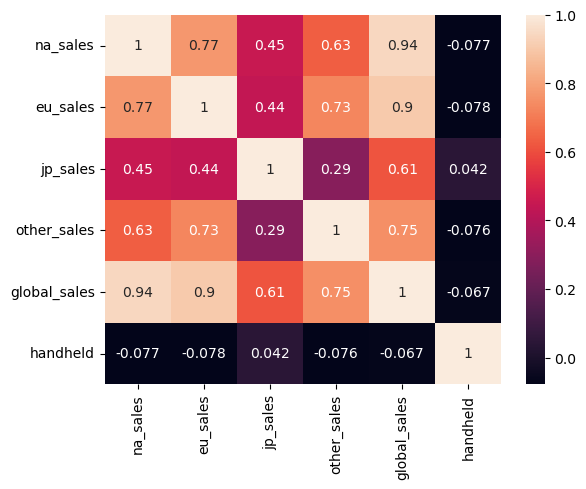

In [24]:
sns.heatmap(df_cleaned.corr(), annot=True)

In [107]:
manufacturers_color_map = {"Nintendo": "rgb(255,1,1)", "Sony":"rgb(51,103,187)", "Sega":"rgb(2,170,155)", "SNK":"rgb(126,101,182)", "Bandai":"rgb(239,194,0)", "Microsoft":"rgb(130,183,75)", "Other":"rgb(0,0,0)", "NEC":"rgb(140,178,157)", "3DO":"rgb(238,175,186)", "Atari":"rgb(254,255,197)"}

fig = px.histogram(df_cleaned, y="company_platform", x="jp_sales", color_discrete_map=manufacturers_color_map, color="company_platform", log_x=True, title="Videogame Sales for Japan by Console Manufacturers")

fig.update_xaxes(title_text="Number of game units sold (millions)")
fig.update_yaxes(title_text="Console Manufacturer")

In [87]:
df_cleaned.groupby("company_platform")["jp_sales"].sum()

company_platform
3DO            0.10
Atari          0.00
Bandai         1.42
Microsoft     14.02
NEC            0.19
Nintendo     755.37
Other          0.17
SNK            1.44
Sega          43.98
Sony         467.58
Name: jp_sales, dtype: float64